# 1-Problem:

Stroke is the third leading cause of death and the leading cause of adult disability, It is also referred to as a brain attack. A stroke is an interruption of the blood supply to any part of the brain. If blood flow was stopped for longer than a few seconds and the brain cannot get blood and oxygen, brain cells can die, and the abilities controlled by that area of the brain are lost. as every second after vessel blockage results in more brain tissue dying. Because Anyone can have a stroke so we decided to focus on this dataset. This dataset is used to predict whether a patient is likely to have a stroke or not, so after selecting this data, we study the probability of patients having it based on some factors that help in predicting whether a patient will be affected by a stroke or not, these factors like bmi, gender, age, various diseases such as hypertension and heart disease, married status and smoking.

# 2-Data Mining Task:

# 3-Data:

# 4-Data Preprocessing:

# 5-Data Mining Technique:

### First: Classification
We used the decision tree approach, which builds a tree iteratively with leaf nodes indicating the ultimate decisions. Our goal was to predict the class label "stroke," which is divided into two categories: "yes" and "no." The prediction was "age", "avg_glucose_level", "hypertension", and "heart_disease" which were obtained from the feature selection results.

The classification technique involved splitting the dataset into two subsets: 
Training dataset: Used for constructing the decision tree model.
Testing dataset: Employed to assess the performance of the constructed model.

Also, we have used three different partitions to determine which model will predict well. We tried three different sizes of partitions and two attribute selection measures: Information gain (IG) and Gini index. 

Information gain:
Information gain and entropy are used to measure the usefulness of a feature in a dataset. 
Information gain measures how much information a particular feature contributes to the classification process. It quantifies the reduction in entropy achieved by splitting the data based on that feature.
Entropy is a measure of the impurity or disorder within a set of data. In the context of decision trees, it quantifies the randomness or uncertainty in the target variable.

To use information gain in a decision tree, the algorithm examines different features and calculates the information gain for each one. The feature with the highest information gain is selected as the best choice for splitting the data.
The decision tree algorithm seeks to produce subsets that are more homogeneous or pure in terms of the class labels by choosing features with high information gain. 


Gini index:
The Gini index is a metric used in decision tree algorithms for measuring impurity or the degree of disorder within a set of data. In decision tree algorithms, the Gini index is used to evaluate the quality of potential splits at each node. The split that minimizes the Gini index is selected as the optimal splitting criterion, as it leads to the maximum possible purity or homogeneity in the resulting subsets.

We used a balanced sample of our data consisting of 506 tuples (which will be later split into training and testing).

We have used some libraries available in Python which are:
- sklearn.tree is a package that provides the DecisionTreeClassifier class, which is used for implementing decision tree-based classification algorithms.
- sklearn.model_selection is a package that provides the train_test_split function, which is used for splitting a dataset into training and testing sets.
- sklearn.metrics is a package that provides various metrics for evaluating the performance of machine learning models, such as accuracy, precision, recall, and F1-score.
- confusion_matrix is a function from the sklearn.metrics package that computes a confusion matrix, which is a table that summarizes the performance of a classification model by counting the number of true positives, true negatives, false positives, and false negatives.
- ConfusionMatrixDisplay is a class from the sklearn.metrics package that provides a visual representation of a confusion matrix.
- matplotlib.pyplot is a package that provides functions for creating plots and visualizations, including line plots, scatter plots, bar plots, histograms, etc

# 6-Evaluation And Comparison:

### First: Classification

Since Classification is considered as supervised learning so we need training data to train the model and test data to evaluate its performance. 
To evaluate the effectiveness of our model, we utilized a confusion matrix and measured accuracy metrics on the dataset.
For a good evaluation we mentioned above we have used three different partitions to determine which model will predict well. We used a balanced sample of our data consisting of 506 tuples.



In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import tree

In [2]:
df=pd.read_csv("selected_data_with_target.csv")
fn=df.keys().tolist()[:-1]
x=df[fn]
y=df['stroke']
print(x)

          age  avg_glucose_level  hypertension  heart_disease
0    0.814815           0.833430             0              1
1    0.975309           0.242905             0              1
2    0.592593           0.557047             0              0
3    0.962963           0.570948             1              0
4    0.987654           0.629101             0              0
..        ...                ...           ...            ...
500  0.851852           0.707696             0              0
501  0.827160           0.131938             0              0
502  0.641975           0.828571             0              0
503  0.003951           0.248196             0              0
504  0.370370           0.767917             0              0

[505 rows x 4 columns]


### First partition: Gini index (10% test, 90% training) 

In [21]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.10,random_state=1)
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6862745098039216


[[22  6]
 [10 13]]


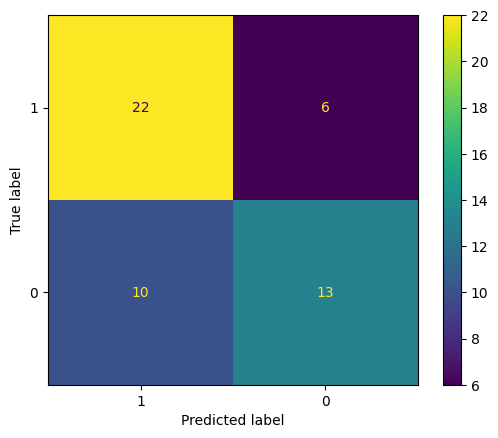

In [22]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['stroke'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)

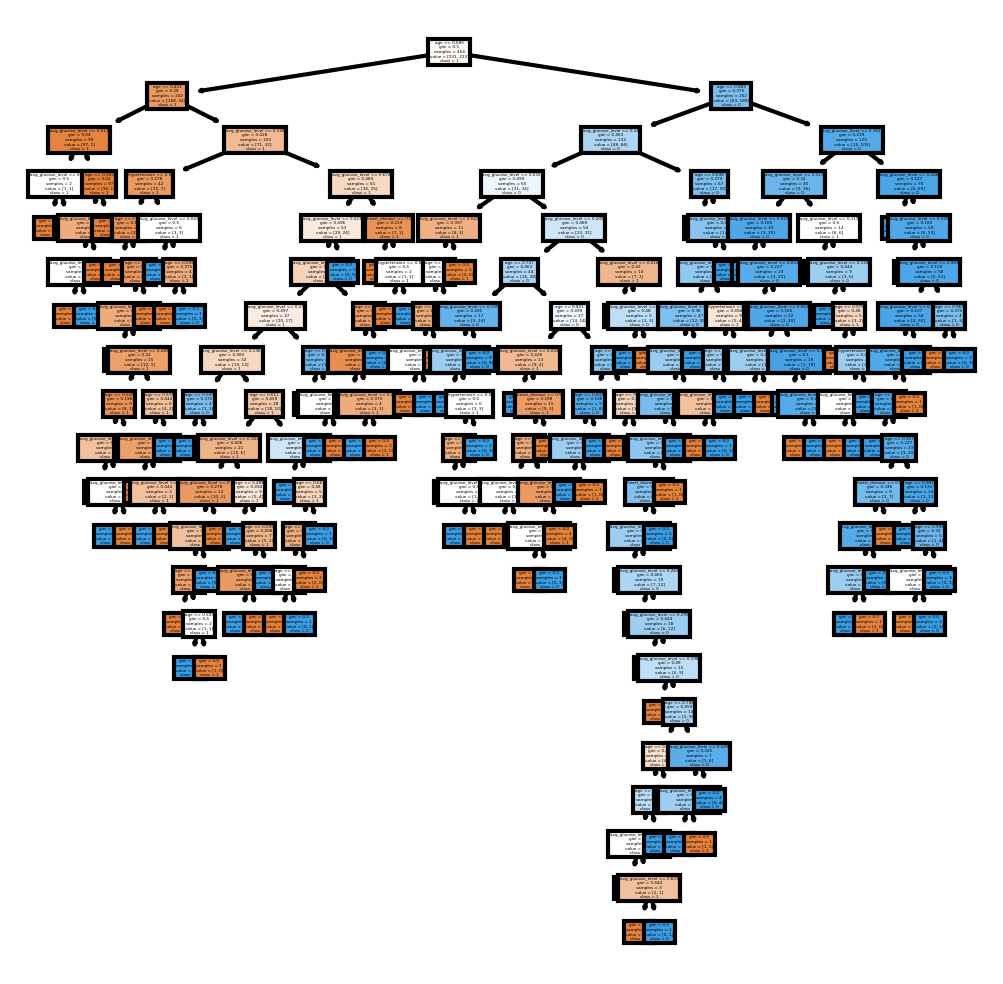

In [23]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(clf, 
               feature_names=fn,
               class_names=[str(cn[i]) for i in range(len(cn))],
               filled=True);

/

### First partition: IG (entropy) (10% test, 90% training) 

In [24]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.10,random_state=1)
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6862745098039216


[[21  7]
 [ 9 14]]


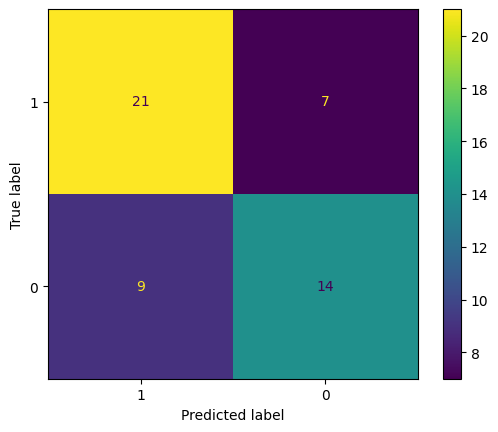

In [25]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['stroke'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)

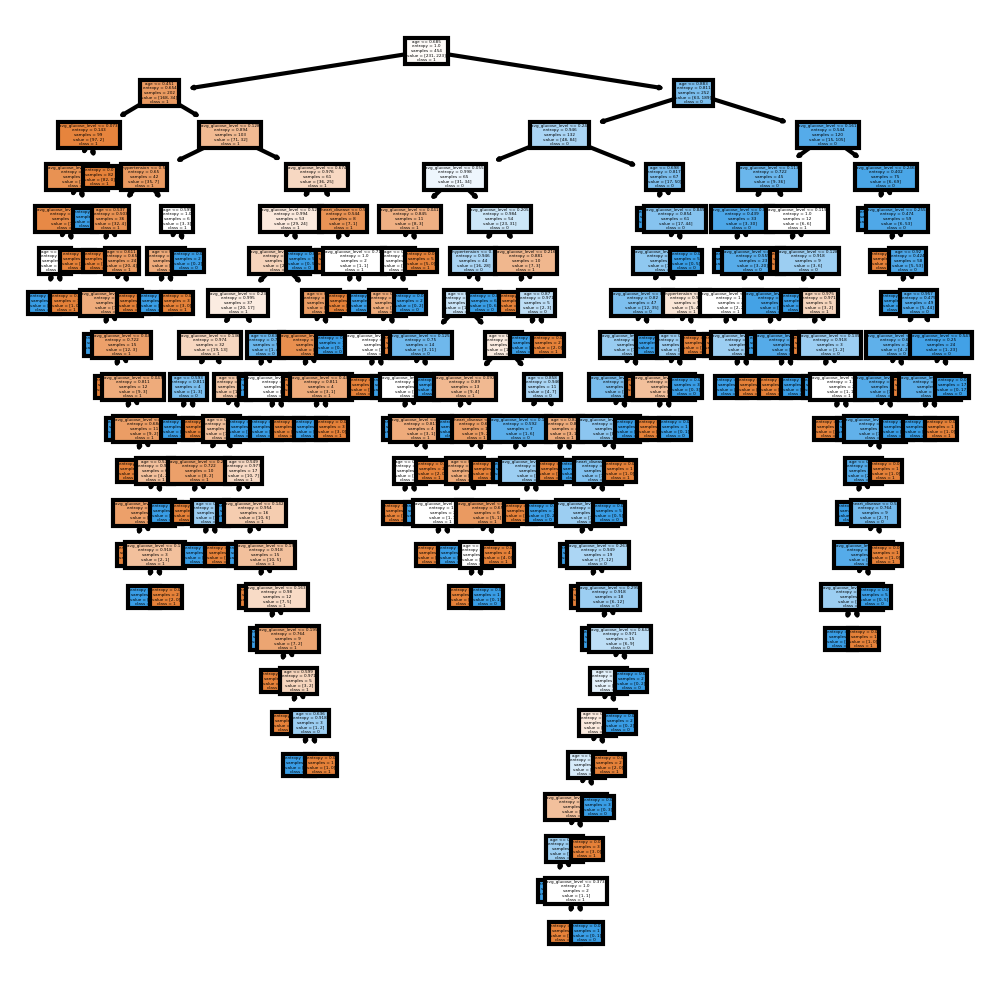

In [26]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(clf, 
               feature_names=fn,
               class_names=[str(cn[i]) for i in range(len(cn))],
               filled=True);

/

### Second partition: Gini index (20% test, 80% training)

In [27]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=1)
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.7128712871287128


[[38 19]
 [10 34]]


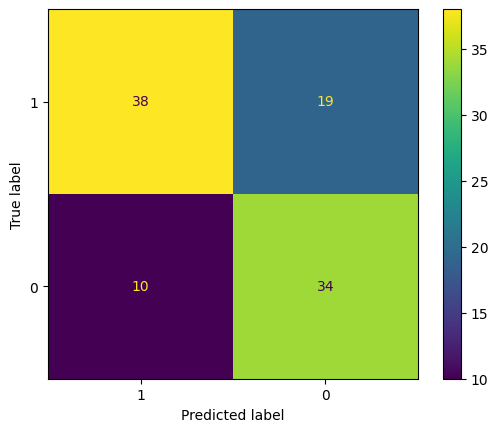

In [28]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['stroke'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)

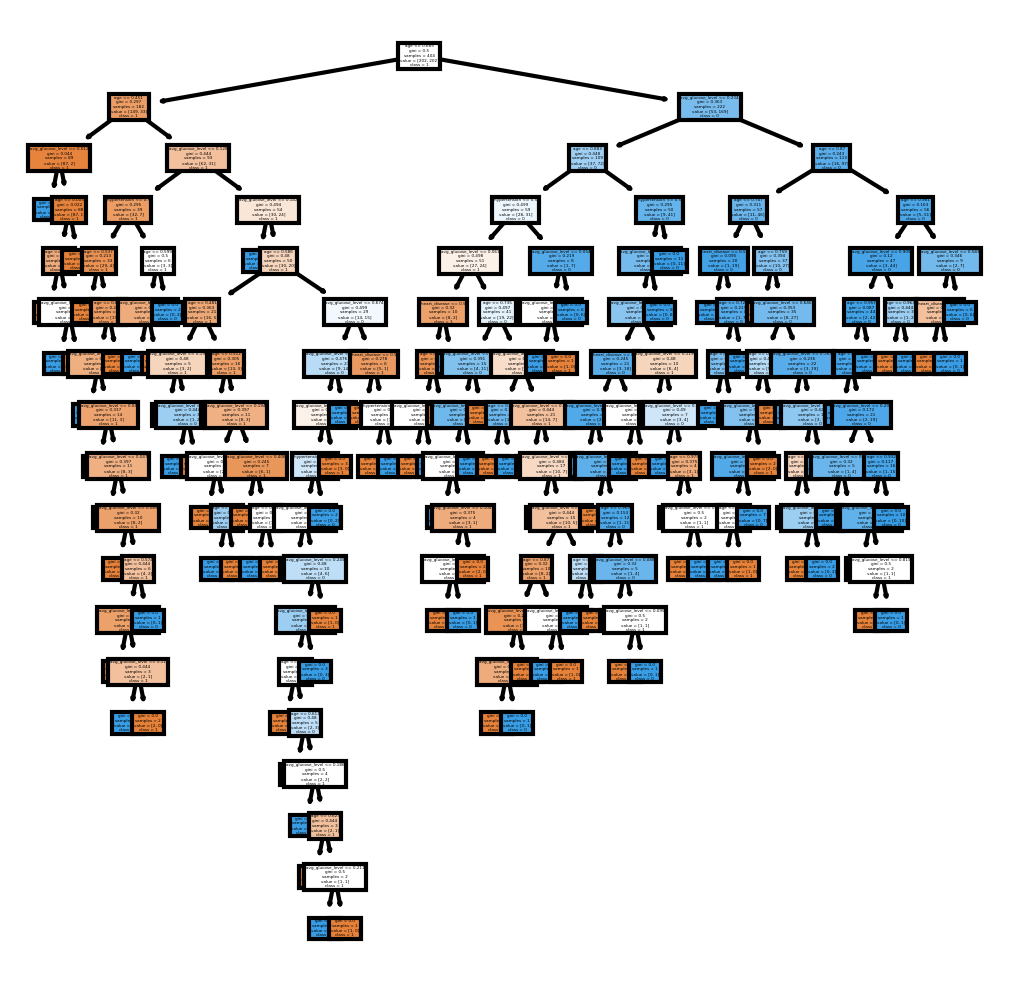

In [29]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(clf, 
               feature_names=fn,
               class_names=[str(cn[i]) for i in range(len(cn))],
               filled=True);

/

### Second partition: IG (entropy) (20% test, 80% training)

In [30]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=1)
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6534653465346535


[[35 22]
 [13 31]]


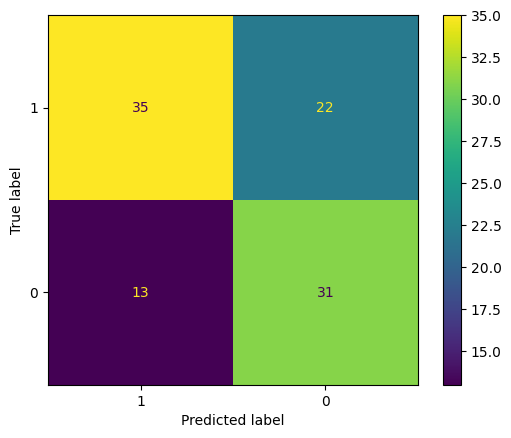

In [31]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['stroke'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)

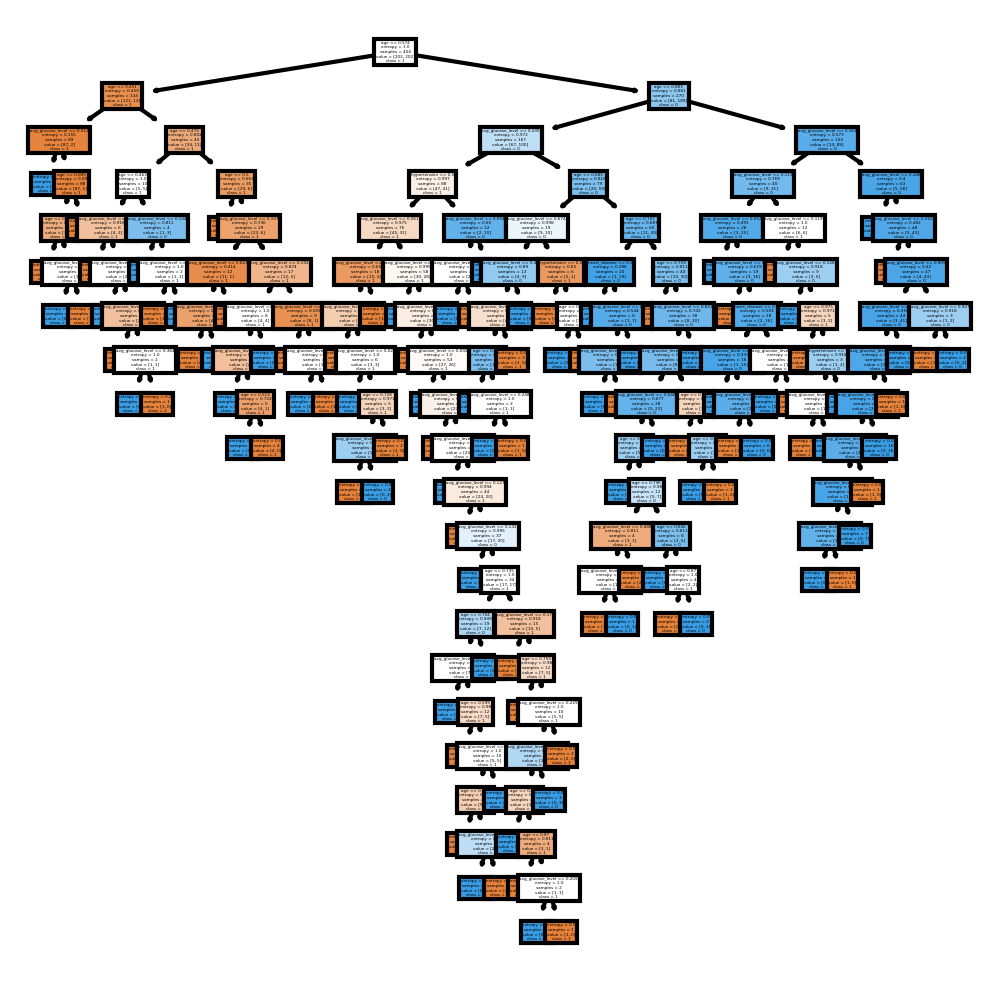

In [32]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(clf, 
               feature_names=fn,
               class_names=[str(cn[i]) for i in range(len(cn))],
               filled=True);

/

### Third partition: Gini index (30% test, 70% training)

In [33]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=1)
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6381578947368421


[[49 33]
 [22 48]]


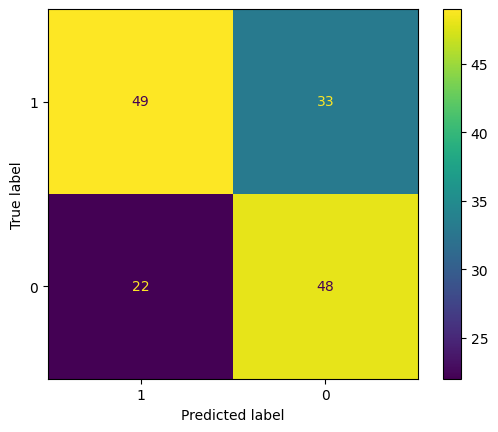

In [34]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['stroke'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)

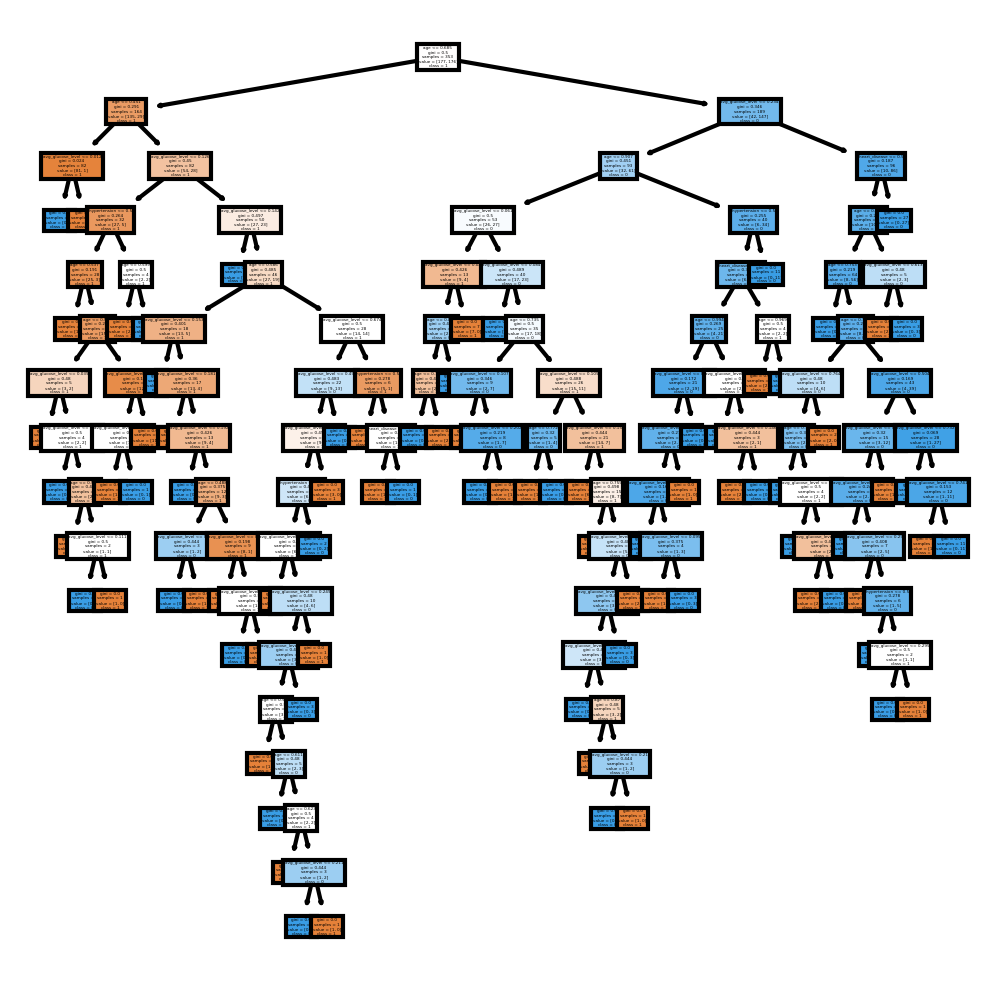

In [35]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(clf, 
               feature_names=fn,
               class_names=[str(cn[i]) for i in range(len(cn))],
               filled=True);

/

### Third partition: IG (entropy) (30% test, 70% training)

In [36]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.30,random_state=1)
clf=DecisionTreeClassifier(criterion="entropy")
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.6842105263157895


[[50 32]
 [16 54]]


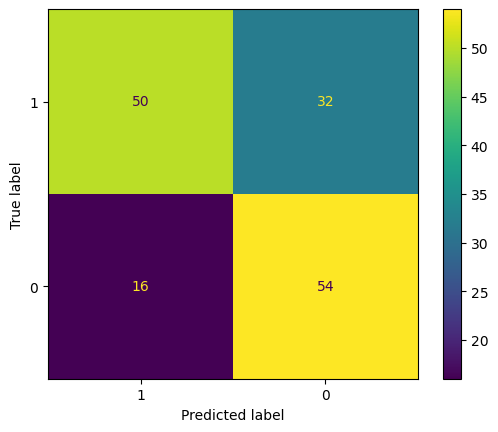

In [37]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
cn=df['stroke'].unique()
disp=ConfusionMatrixDisplay.from_estimator(clf,x_test,y_test,display_labels=cn)

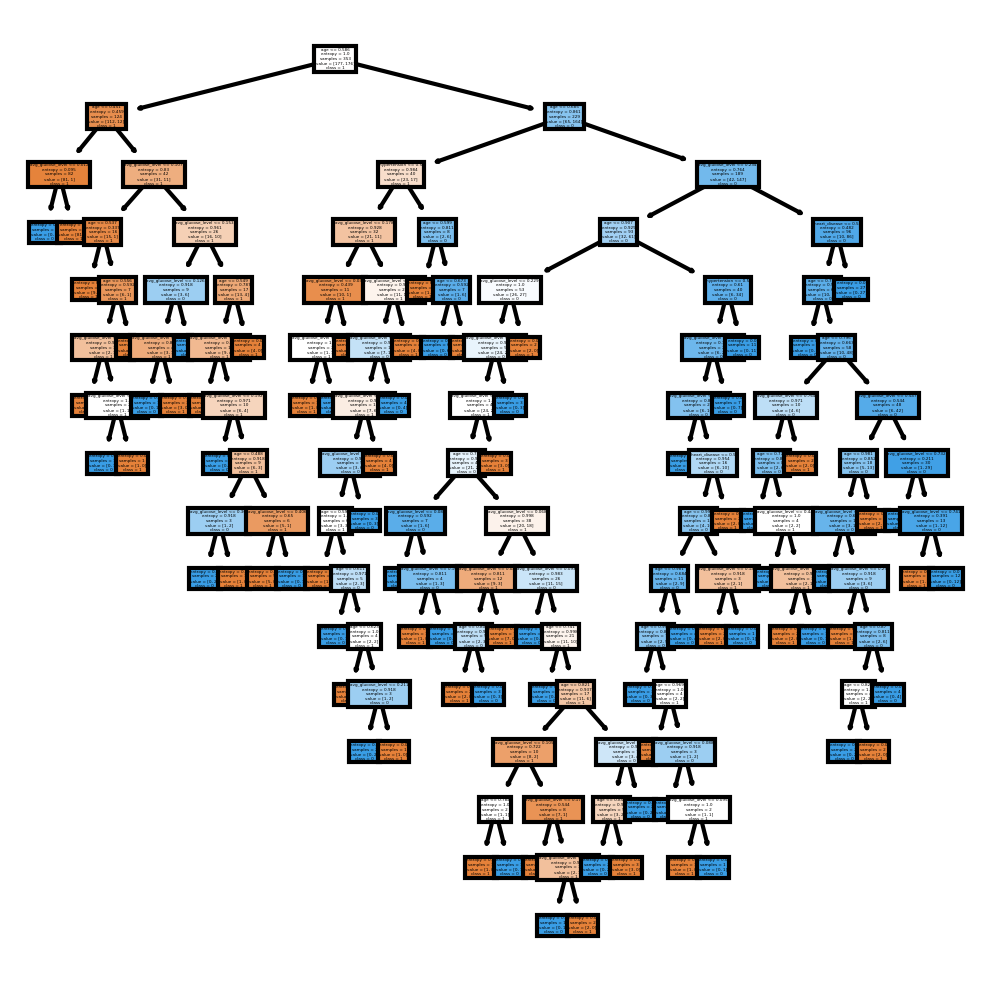

In [38]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=300)
tree.plot_tree(clf, 
               feature_names=fn,
               class_names=[str(cn[i]) for i in range(len(cn))],
               filled=True);

/

|Training Set Size | Testing Set Siz | Accuracy IG   |  Accuracy Gini Index
| :----     | :-----:     | :----:    |     :----:         |
|  90%   |   10%          |      68%  |   68%          |
|     80%  |  20%          |       65%  |71%|
|  70%     |  30%       | 68%   | 63%


1- First Partition Size: 10% test, 90% training
Gini Index Accuracy: 68%
Information Gain Accuracy: 68%
Observation: with such a small test dataset, the model might be overfitting and not generalizing well


2- Second Partition Size: 20% test, 80% training 
Gini Index Accuracy: 71%
Information Gain Accuracy: 65%
Observation: The model's accuracy in classifying strokes is good, but the third partition has the best accuracy

3- Third Partition Size: 30% test, 70% training
Gini Index Accuracy: 63%
Information Gain Accuracy: 68%
Observation: The model achieved reasonable accuracy in classifying whether a person is suffering from a stroke or not. These results indicate good performance.

In conclusion, the Third partition size of  30% test and 70% training yielded relatively good accuracy for both attribute selection measures. However, with a very small test dataset, the model's accuracy might not reflect its true performance on data. Additionally, the second partition has good accuracy but has a few problem while classify

# 7-Findings:

# 8-Refrences:

[1] IZZET TURKALP AKBASLI, “Brain stroke prediction dataset,” Kaggle, Jul. 15, 2022.

https://www.kaggle.com/datasets/zzettrkalpakbal/full-filled-brain-stroke-dataset